<a href="https://colab.research.google.com/github/datacentertugaskuliah-coder/PraktikumDS/blob/main/Prediksi_Skor_Akhir_Siswa_dengan_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jumlah fitur setelah encoding: 39
Lima baris pertama hasil encoding:
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         0       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     2  ...             True           False           True       False   
3     1  ...             True           False          False        True   
4     1  ...            False           False          False        Tr

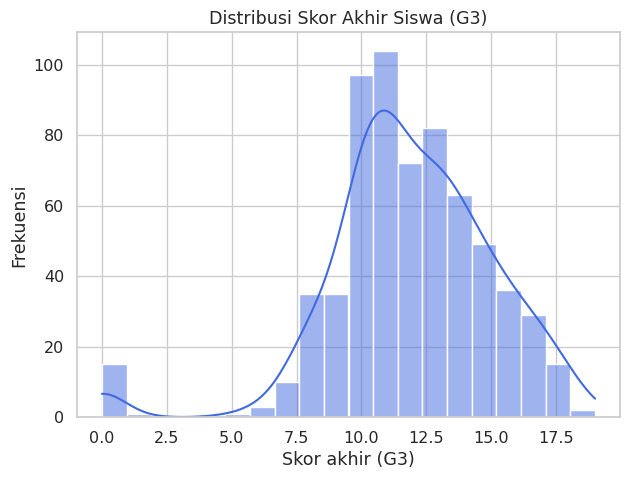

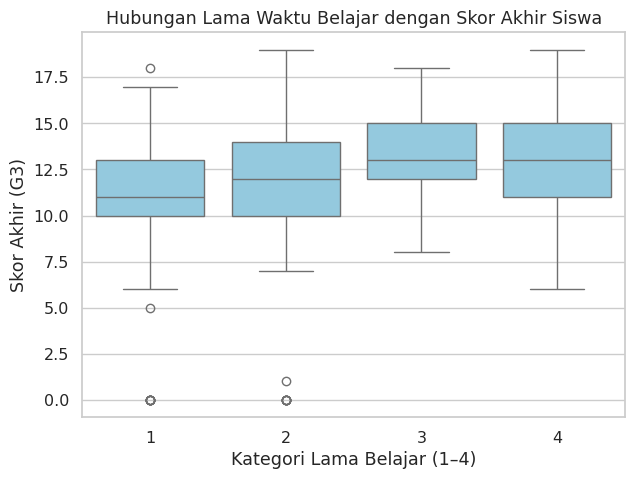

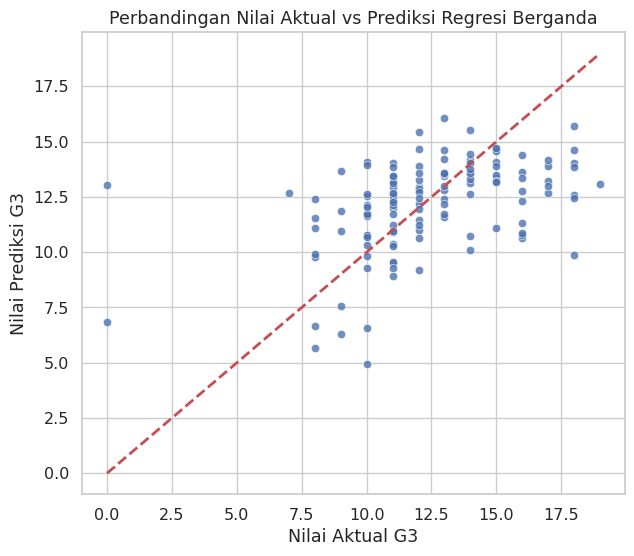

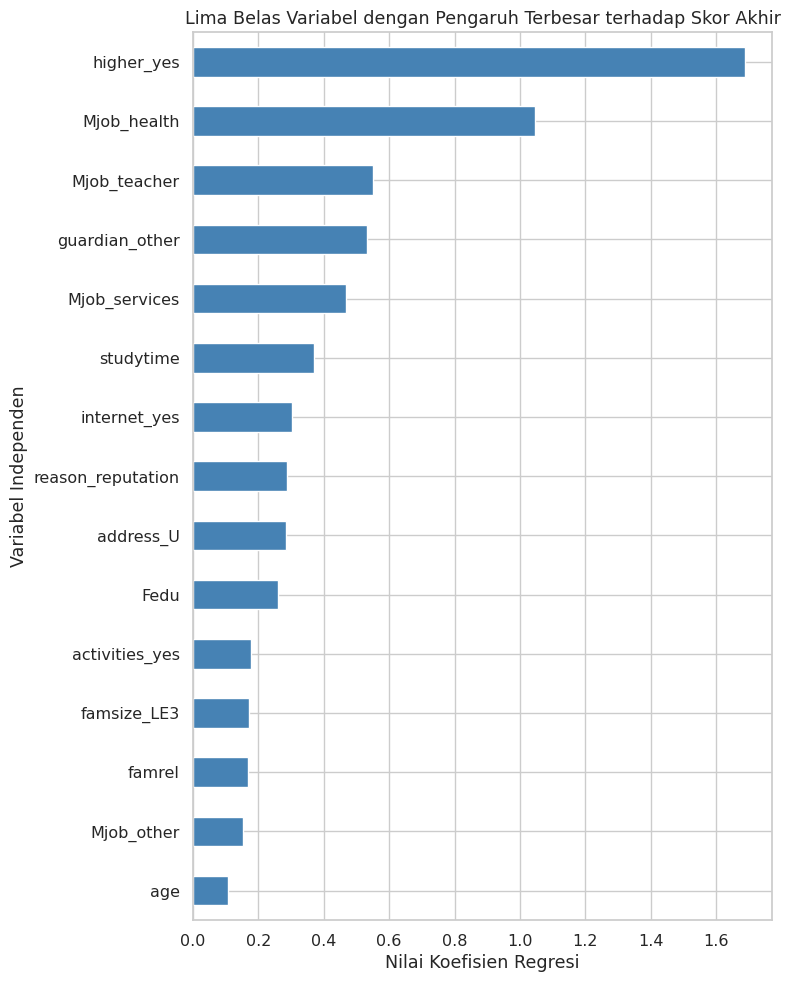

=== Analisis Regresi Berganda ===
Model regresi berganda menggunakan 39 variabel prediktor untuk memprediksi skor akhir siswa (G3).
Nilai R² sebesar 0.16 menunjukkan bahwa model mampu menjelaskan sekitar 16.0% variasi nilai akhir siswa.
Variabel dengan koefisien positif besar, seperti waktu belajar dan dukungan orang tua, cenderung meningkatkan skor akhir.
Sebaliknya, koefisien negatif mengindikasikan faktor-faktor yang menurunkan performa akademik, seperti absen atau konsumsi alkohol.


In [12]:
# ==========================================================
# Judul Program : Analisis Regresi Berganda pada Prediksi Skor Akhir Siswa
# Praktikum Data Science dan Machine Learning Berbasis Python dan UCI Repository
# Proyek : Prediksi skor siswa pada dataset Student Performance (UCI)
# Dataset : Student Performance – UCI Machine Learning Repository (ID: 320)
# Repo : https://github.com/datacentertugaskuliah-coder/PraktikumDS.git
# Lingkungan : Google Colab
# ==========================================================

# Instalasi pustaka tambahan
!pip install ucimlrepo -q

# Tahap 1 – Import pustaka
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.05)

# Tahap 2 – Memuat dataset Student Performance dari UCI
student = fetch_ucirepo(id=320)
X = student.data.features
y = student.data.targets["G3"]

# Tahap 3 – Mengubah variabel kategorik menjadi numerik (encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

print("Jumlah fitur setelah encoding:", X_encoded.shape[1])
print("Lima baris pertama hasil encoding:")
print(X_encoded.head(), "\n")

# Tahap 4 – Pembagian data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Tahap 5 – Membangun model Regresi Berganda
# Regresi berganda = LinearRegression dengan banyak variabel independen
model = LinearRegression()
model.fit(X_train, y_train)

# Tahap 6 – Evaluasi model
y_pred = model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("=== HASIL EVALUASI MODEL REGRESI BERGANDA ===")
print(f"Mean Squared Error (MSE) : {mse:.3f}")
print(f"Root Mean Squared Error  : {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score                 : {r2:.3f}\n")

# ==========================================================
# Tahap 7 – Analisis dan Visualisasi
# ==========================================================

# 7.1 Distribusi nilai akhir (target)
plt.figure(figsize=(7,5))
sns.histplot(y, bins=20, kde=True, color="royalblue")
plt.title("Distribusi Skor Akhir Siswa (G3)")
plt.xlabel("Skor akhir (G3)")
plt.ylabel("Frekuensi")
plt.show()

# 7.2 Hubungan salah satu fitur utama dengan skor akhir
if "studytime" in X.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=X["studytime"], y=y, color="skyblue")
    plt.title("Hubungan Lama Waktu Belajar dengan Skor Akhir Siswa")
    plt.xlabel("Kategori Lama Belajar (1–4)")
    plt.ylabel("Skor Akhir (G3)")
    plt.show()

# 7.3 Grafik perbandingan nilai aktual dan prediksi
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.8)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.title("Perbandingan Nilai Aktual vs Prediksi Regresi Berganda")
plt.xlabel("Nilai Aktual G3")
plt.ylabel("Nilai Prediksi G3")
plt.show()

# 7.4 Koefisien regresi berganda
coef_df = pd.Series(model.coef_, index=X_encoded.columns).sort_values()

plt.figure(figsize=(8,10))
coef_df.tail(15).plot(kind="barh", color="steelblue")
plt.title("Lima Belas Variabel dengan Pengaruh Terbesar terhadap Skor Akhir")
plt.xlabel("Nilai Koefisien Regresi")
plt.ylabel("Variabel Independen")
plt.tight_layout()
plt.show()

# ==========================================================
# Tahap 8 – Analisis Hasil
# ==========================================================
print("=== Analisis Regresi Berganda ===")
print(f"Model regresi berganda menggunakan {X_encoded.shape[1]} variabel prediktor untuk memprediksi skor akhir siswa (G3).")
print(f"Nilai R² sebesar {r2:.2f} menunjukkan bahwa model mampu menjelaskan sekitar {r2*100:.1f}% variasi nilai akhir siswa.")
print("Variabel dengan koefisien positif besar, seperti waktu belajar dan dukungan orang tua, cenderung meningkatkan skor akhir.")
print("Sebaliknya, koefisien negatif mengindikasikan faktor-faktor yang menurunkan performa akademik, seperti absen atau konsumsi alkohol.")
